In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wal-sales-prediction/features.csv
/kaggle/input/wal-sales-prediction/test.csv
/kaggle/input/wal-sales-prediction/train.csv
/kaggle/input/wal-sales-prediction/sampleSubmission.csv
/kaggle/input/wal-sales-prediction/stores.csv
/kaggle/input/wallmartsales/features.csv


In [78]:
features = pd.read_csv("/kaggle/input/wallmartsales/features.csv")
train_set = pd.read_csv("/kaggle/input/wal-sales-prediction/train.csv")
test_set = pd.read_csv("/kaggle/input/wal-sales-prediction/test.csv")
stores = pd.read_csv("/kaggle/input/wal-sales-prediction/stores.csv")

In [79]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [80]:
train_set

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [81]:
test_set

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [82]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [83]:
from statistics import mean
features['CPI']

0       211.096358
1       211.242170
2       211.289143
3       211.319643
4       211.350143
           ...    
8185           NaN
8186           NaN
8187           NaN
8188           NaN
8189           NaN
Name: CPI, Length: 8190, dtype: float64

In [84]:
features['CPI'].mean()


172.46080918276078

In [85]:
from statistics import mean
features['CPI'] = features['CPI'].fillna(features['CPI'].mean())
features['Unemployment'] = features['Unemployment'].fillna(features['Unemployment'].mean())
features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)

In [86]:
#features.convert_objects(convert_numeric=True)
#features['CPI'] = features['CPI'].fillna(mean(features['CPI']), inplace = True)
#features = features.drop(columns = ('Markdown1', 'Markdown2', 'Markdown3', 'Markdown4', 'Markdown5'))

In [87]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.460809,7.826821,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.460809,7.826821,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.460809,7.826821,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.460809,7.826821,False


In [88]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [89]:
new_data = pd.merge(features, train_set, on=['Store','Date','IsHoliday'], how='inner')
# merging(adding) all stores info with new training data
final_data = pd.merge(new_data,stores,how='inner',on=['Store'])

In [90]:
test_set1 = pd.merge(features, test_set, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
final_test_set = pd.merge(test_set1, stores, how = 'inner', on = ['Store'])

In [91]:
final_test_set

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,False,1,A,151315
1,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,False,2,A,151315
2,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,False,3,A,151315
3,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,False,4,A,151315
4,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,False,5,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,172.460809,7.826821,False,93,B,118221
115060,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,172.460809,7.826821,False,94,B,118221
115061,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,172.460809,7.826821,False,95,B,118221
115062,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,172.460809,7.826821,False,97,B,118221


In [92]:
#new_data.head()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 45.4+ MB


In [93]:
final_data.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [94]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [95]:
final_data = final_data.sort_values(by = 'Date')

In [96]:
final_test_set = final_test_set.sort_values(by = 'Date')

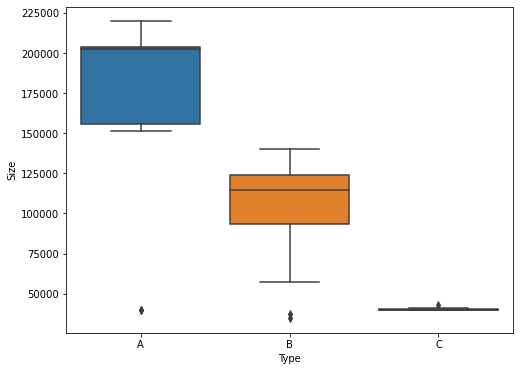

In [97]:
import seaborn as sns
from matplotlib import pyplot as plt
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)


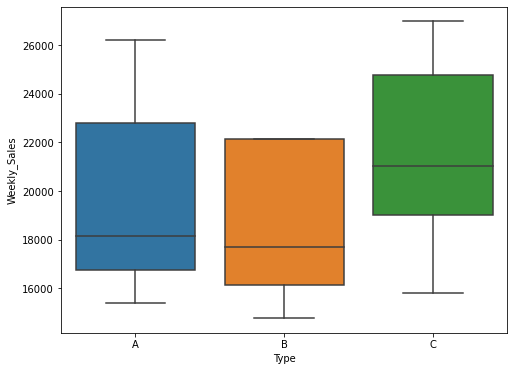

In [98]:
store_sale = pd.concat([stores['Type'], train_set['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [99]:
# total count of sales on holidays and non holidays
print('sales on non-holiday : ',train_set[train_set['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',train_set[train_set['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


[]

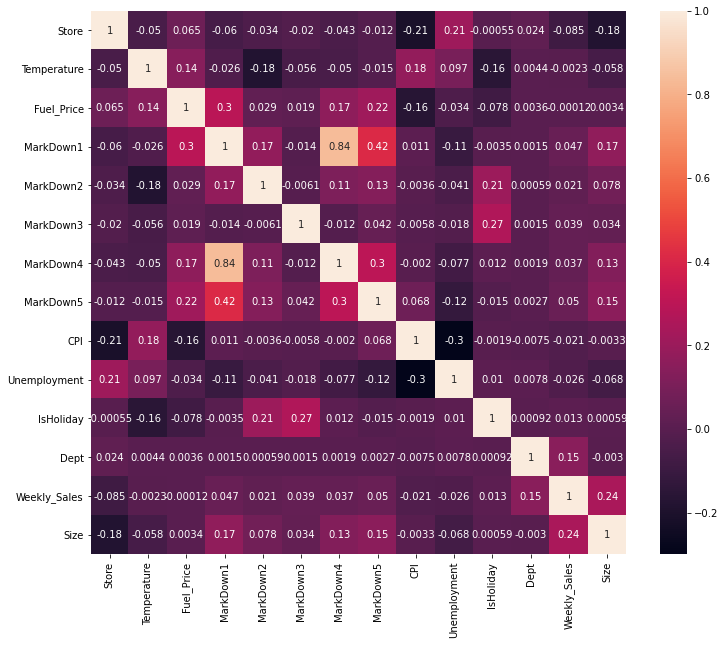

In [100]:
corr = final_data.corr()
plt.figure(figsize =(12, 10))
sns.heatmap(corr, annot = True)
plt.plot()

In [108]:
final_data["Year"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.year
final_data["Day"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.day

In [107]:
final_test_set['Year'] = pd.to_datetime(final_test_set["Date"], format = "%Y-%m-%d").dt.year
final_test_set["Day"] = pd.to_datetime(final_test_set["Date"], format="%Y-%m-%d").dt.day

In [109]:
# Add column for days to next Christmas
final_data["Days to Next Christmas"] = (pd.to_datetime(final_data["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)
final_test_set["Days to Next Christmas"] = (pd.to_datetime(final_test_set["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_test_set["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [122]:
final_data

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Christmas
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71,A,219622,2012,26,66
128052,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00,A,219622,2012,26,66
128053,13,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93,A,219622,2012,26,66
390991,41,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78,A,196321,2012,26,66


In [123]:
tp = pd.get_dummies(final_data.Type)



In [124]:
tp

,A,B,C
0,1,0,0
330761,0,1,0
330762,0,1,0
330763,0,1,0
330764,0,1,0
...,...,...,...
128051,1,0,0
128052,1,0,0
128053,1,0,0
390991,1,0,0


In [125]:
final_data = pd.concat([final_data, tp], axis=1)
final_data = final_data.drop(columns='Type')


In [126]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Store                   421570 non-null  int64  
 1   Temperature             421570 non-null  float64
 2   Fuel_Price              421570 non-null  float64
 3   MarkDown1               421570 non-null  float64
 4   MarkDown2               421570 non-null  float64
 5   MarkDown3               421570 non-null  float64
 6   MarkDown4               421570 non-null  float64
 7   MarkDown5               421570 non-null  float64
 8   CPI                     421570 non-null  float64
 9   Unemployment            421570 non-null  float64
 10  IsHoliday               421570 non-null  bool   
 11  Dept                    421570 non-null  int64  
 12  Weekly_Sales            421570 non-null  float64
 13  Size                    421570 non-null  int64  
 14  Year                

In [127]:
X = final_data.drop(['Weekly_Sales'], axis = 1)
y = final_data['Weekly_Sales'] 
#pd.to_datetime(X['Date'])
#pd.to_datetime(y['Date'])

In [128]:
X.head()
#X_ohe = pd.get_dummies(X)

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Size,Year,Day,Days to Next Christmas,A,B,C
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,151315,2010,5,329,1,0,0
330761,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,103681,2010,5,329,0,1,0
330762,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,103681,2010,5,329,0,1,0
330763,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,103681,2010,5,329,0,1,0
330764,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,103681,2010,5,329,0,1,0


In [129]:
print(X.shape)
print(y.shape)

(421570, 19)
(421570,)


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [147]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [137]:
score_knn = knn.score(X_test, y_test)
print(score_knn)

0.2793701481444243


In [132]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [141]:
DT_score = dt.score(X_test, y_test)
print(DT_score*100)

96.17548391984757


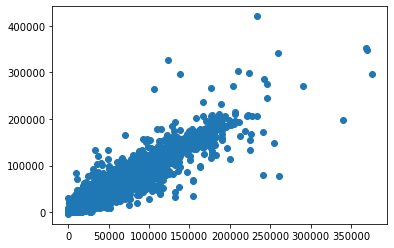

In [140]:
plt.scatter(y_pred, y_test)

In [145]:
# After Hyper-parameter tunning 
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [146]:
print(rfr.score(X_test, y_test))

0.967782995614837
